## Importing the data and libraries

In [2]:
import pandas as pd
import numpy as np


In [5]:
# data import
df=pd.read_csv("data.csv")
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

### As Column 1 ,2, 3, 4, 5 is physical QUANTITY having numerical value so it should not be object suggesting that some non-numeric character or NaN ### 

In [37]:
df["equipment_energy_consumption"].unique()

df['equipment_energy_consumption'].value_counts().to_dict()



{'50.0': 3400,
 '60.0': 2385,
 '40.0': 1762,
 '70.0': 1193,
 '80.0': 905,
 '90.0': 790,
 '100.0': 742,
 '30.0': 656,
 '110.0': 543,
 '120.0': 391,
 '20.0': 318,
 '130.0': 256,
 '140.0': 182,
 '1139.9856929495108': 166,
 '-944.5664110012307': 160,
 '150.0': 109,
 '190.0': 70,
 '260.0': 68,
 '280.0': 67,
 '230.0': 66,
 '300.0': 63,
 '160.0': 62,
 '240.0': 62,
 '180.0': 61,
 '270.0': 61,
 '250.0': 60,
 '220.0': 58,
 '310.0': 56,
 '210.0': 56,
 '170.0': 55,
 '370.0': 54,
 '290.0': 53,
 '350.0': 53,
 '390.0': 52,
 '320.0': 51,
 '330.0': 50,
 '340.0': 48,
 '360.0': 48,
 '200.0': 47,
 '380.0': 38,
 '400.0': 36,
 '410.0': 34,
 '-50.0': 32,
 '440.0': 30,
 '420.0': 27,
 '430.0': 23,
 '-40.0': 22,
 'unknown': 20,
 '???': 19,
 'error': 19,
 '470.0': 18,
 '480.0': 18,
 '450.0': 18,
 '510.0': 16,
 '-60.0': 15,
 '530.0': 14,
 '590.0': 14,
 '-70.0': 13,
 '460.0': 13,
 '490.0': 13,
 '610.0': 12,
 '600.0': 10,
 '520.0': 10,
 'check': 10,
 '580.0': 10,
 '500.0': 10,
 '700.0': 9,
 '660.0': 9,
 '630.0': 9,

In [39]:

# dropping the non-character data in column

# Convert  column to numeric, forcing invalid strings (like 'unknown') to NaN
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Drop rows where temperature is NaN ( invalid or missing)
df.dropna(subset=['equipment_energy_consumption'], inplace=True)


In [45]:
# other column study
df["lighting_energy"].unique()

df['lighting_energy'].value_counts().to_dict()


{'0.0': 11078,
 '10.0': 1781,
 '20.0': 1267,
 '30.0': 450,
 '-77.78778596503064': 171,
 '86.00296632575207': 162,
 '-0.0': 106,
 '40.0': 67,
 '???': 24,
 '-10.0': 22,
 '-20.0': 16,
 'error': 13,
 'check': 9,
 'unknown': 9,
 '50.0': 6,
 '-30.0': 6,
 '-86.00296632575207': 3,
 '-40.0': 2,
 '60.0': 1,
 '70.0': 1}

In [49]:
df["zone1_temperature"].unique()
df['zone1_temperature'].value_counts().to_dict()


{'21.0': 426,
 '21.39': 408,
 '21.5': 403,
 '21.2': 398,
 '21.29': 386,
 '20.89': 360,
 '21.1': 357,
 '21.79': 339,
 '21.89': 336,
 '22.2': 335,
 '22.0': 334,
 '22.1': 333,
 '21.7': 323,
 '20.79': 320,
 '21.6': 294,
 '22.5': 255,
 '22.6': 250,
 '20.7': 246,
 '22.29': 246,
 '22.39': 243,
 '20.6': 236,
 '22.7': 224,
 '20.0': 205,
 '22.79': 193,
 '20.1': 190,
 '20.5': 174,
 '22.89': 173,
 '19.89': 167,
 '33.74660933896648': 156,
 '20.2': 154,
 '20.29': 144,
 '20.39': 142,
 '8.726817924356236': 141,
 '23.0': 141,
 '19.7': 134,
 '19.79': 134,
 '19.6': 128,
 '19.5': 101,
 '19.39': 96,
 '19.0': 91,
 '23.2': 89,
 '23.1': 87,
 '19.29': 79,
 '19.1': 76,
 '19.2': 73,
 '20.9266666666667': 64,
 '21.9266666666667': 62,
 '18.89': 61,
 '22.066666666666695': 60,
 '21.1666666666667': 60,
 '21.4266666666667': 57,
 '21.73': 57,
 '20.963333333333296': 57,
 '22.1333333333333': 56,
 '22.033333333333296': 55,
 '21.533333333333296': 55,
 '21.26': 55,
 '18.79': 54,
 '21.323333333333295': 53,
 '21.96333333333329

In [54]:
df["zone1_humidity"].unique()

df['zone1_humidity'].value_counts().to_dict()


{'3.348059697903068': 139,
 '76.29275599510133': 128,
 '37.2': 113,
 '39.09': 108,
 '37.7': 105,
 '36.9': 103,
 '38.29': 101,
 '37.09': 99,
 '39.0': 97,
 '38.79': 96,
 '38.7': 90,
 '38.09': 89,
 '39.4': 86,
 '36.29': 83,
 '38.2': 83,
 '37.4': 82,
 '38.59': 79,
 '39.9': 78,
 '35.4': 75,
 '35.2': 74,
 '39.5': 72,
 '39.2': 71,
 '43.29': 69,
 '37.0': 68,
 '37.5': 67,
 '39.59': 66,
 '35.5': 65,
 '38.0': 64,
 '36.09': 64,
 '35.79': 62,
 '37.29': 62,
 '37.9': 61,
 '41.29': 61,
 '35.29': 61,
 '37.59': 59,
 '35.7': 59,
 '38.4': 58,
 '39.7': 57,
 '38.5': 55,
 '36.2': 55,
 '43.7': 55,
 '41.0': 53,
 '41.5': 53,
 '36.59': 52,
 '38.9': 52,
 '40.5': 52,
 '36.79': 51,
 '43.4': 51,
 '41.4': 51,
 '43.09': 51,
 '40.29': 50,
 '39.29': 50,
 '39.79': 49,
 '37.79': 49,
 '41.2': 49,
 '42.09': 49,
 '40.59': 48,
 '36.7': 48,
 '43.79': 47,
 '43.9': 47,
 '41.9': 47,
 '40.0': 47,
 '35.0': 47,
 '40.9': 46,
 '44.0': 46,
 '42.4': 46,
 '35.09': 46,
 '35.59': 46,
 '40.09': 45,
 '42.5': 44,
 '41.7': 44,
 '42.29': 44,
 '

In [59]:

df["zone2_temperature"].unique()

df['zone2_temperature'].value_counts().to_dict()


{'19.6': 243,
 '19.5': 237,
 '19.2': 236,
 '19.7': 231,
 '19.29': 215,
 '19.1': 211,
 '19.39': 199,
 '18.79': 192,
 '20.29': 191,
 '19.0': 187,
 '20.5': 187,
 '19.79': 186,
 '18.89': 186,
 '18.5': 183,
 '18.39': 182,
 '20.1': 180,
 '18.2': 180,
 '20.39': 176,
 '20.0': 172,
 '20.6': 166,
 '19.89': 163,
 '18.7': 162,
 '18.1': 161,
 '18.6': 158,
 '20.7': 152,
 '18.29': 150,
 '20.89': 147,
 '36.55288237266245': 143,
 '17.79': 142,
 '18.0': 140,
 '20.2': 140,
 '21.1': 137,
 '2.9881989040997503': 127,
 '21.2': 123,
 '20.79': 119,
 '17.5': 116,
 '21.0': 113,
 '21.29': 111,
 '21.7': 109,
 '17.89': 104,
 '17.7': 98,
 '21.5': 89,
 '21.89': 87,
 '17.6': 86,
 '17.29': 75,
 '21.6': 73,
 '17.1': 72,
 '17.2': 71,
 '19.566666666666695': 70,
 '17.39': 68,
 '21.39': 67,
 '21.79': 64,
 '22.0': 62,
 '18.823333333333295': 57,
 '19.6333333333333': 55,
 '16.89': 54,
 '19.1333333333333': 54,
 '19.26': 54,
 '19.23': 52,
 '22.1': 52,
 '19.323333333333295': 50,
 '19.4266666666667': 50,
 '19.8566666666667': 49,
 

In [60]:
def non_numeric_remover(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df = df.dropna(subset=[column_name])
    return df

In [61]:
df=non_numeric_remover(df, "zone2_temperature")

In [62]:
df.shape   # some rows are removed

(12799, 29)

#### Till now we tried to remove the row with non numeric values row reduced from (16857) to (12799)

In [65]:
# commit data
!git status
!git add smart_factory_energy_prediction.ipynb


On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	smart_factory_energy_prediction.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git config --global user.name "Sudeep-Sapkota"
!git config --global user.email "sudeepsapkota511@gmail.com"


In [ ]:
!git commit -m "Preprocessing: Removed non-numeric values from 'equipment_energy_consumption',lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature"


In [ ]:
!git push origin main

In [63]:
df.isnull().sum()  # this give total number of missing values in each column

timestamp                         0
equipment_energy_consumption      0
lighting_energy                   0
zone1_temperature                 0
zone1_humidity                    0
zone2_temperature                 0
zone2_humidity                  681
zone3_temperature               599
zone3_humidity                  654
zone4_temperature               639
zone4_humidity                  592
zone5_temperature               630
zone5_humidity                  608
zone6_temperature               656
zone6_humidity                  639
zone7_temperature               589
zone7_humidity                  600
zone8_temperature               633
zone8_humidity                  582
zone9_temperature               594
zone9_humidity                  683
outdoor_temperature             607
atmospheric_pressure            653
outdoor_humidity                604
wind_speed                      633
visibility_index                615
dew_point                       623
random_variable1            

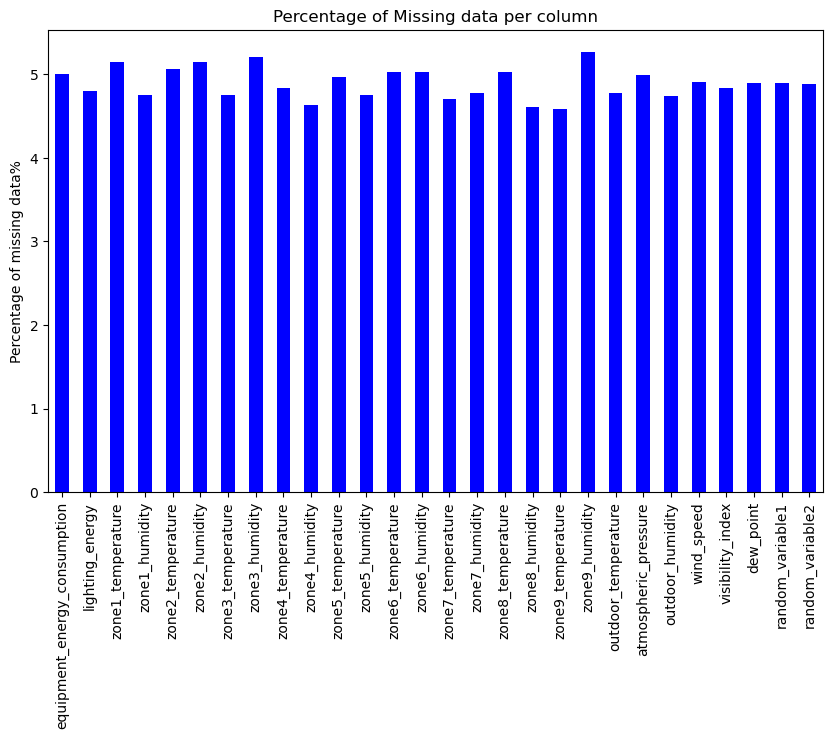

In [18]:
# Visualizing missing data as a bar plot
missing_data = df.isnull().mean() * 100  # Percentage of missing data per column
missing_data = missing_data[missing_data > 0]  # Only columns with missing data
missing_data.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Percentage of Missing data per column')
plt.ylabel('Percentage of missing data%')
plt.show()



### as there is aprrox 5% missing values in the 27 column  we need to do substiturion by eaither mean or median  
### i am taking median for float values column and 


In [19]:
# missing values substitution by median
